<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Подготовка данных</a></span><ul class="toc-item"><li><span><a href="#Загрузка" data-toc-modified-id="Загрузка-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Загрузка</a></span></li><li><span><a href="#Проверка-эффективности-обогащения" data-toc-modified-id="Проверка-эффективности-обогащения-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Проверка эффективности обогащения</a></span></li><li><span><a href="#Анализ-признаков" data-toc-modified-id="Анализ-признаков-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Анализ признаков</a></span></li></ul></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-концентрации-металлов" data-toc-modified-id="Анализ-концентрации-металлов-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Анализ концентрации металлов</a></span></li><li><span><a href="#Анализ-распределения-размеров-гранул" data-toc-modified-id="Анализ-распределения-размеров-гранул-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Анализ распределения размеров гранул</a></span></li><li><span><a href="#Исследование-суммарной-концентрации-веществ" data-toc-modified-id="Исследование-суммарной-концентрации-веществ-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Исследование суммарной концентрации веществ</a></span></li></ul></li><li><span><a href="#Подготовка-данных-для-обучения-моделей" data-toc-modified-id="Подготовка-данных-для-обучения-моделей-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Подготовка данных для обучения моделей</a></span><ul class="toc-item"><li><span><a href="#Добавление-целевых-признаков" data-toc-modified-id="Добавление-целевых-признаков-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Добавление целевых признаков</a></span></li><li><span><a href="#Удаление-признаков" data-toc-modified-id="Удаление-признаков-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Удаление признаков</a></span></li><li><span><a href="#Стандартизация-признаков" data-toc-modified-id="Стандартизация-признаков-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Стандартизация признаков</a></span></li></ul></li><li><span><a href="#Модель" data-toc-modified-id="Модель-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель</a></span><ul class="toc-item"><li><span><a href="#Рассчет-sMAPE" data-toc-modified-id="Рассчет-sMAPE-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Рассчет sMAPE</a></span></li><li><span><a href="#Обучение-и-настройка-моделей" data-toc-modified-id="Обучение-и-настройка-моделей-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Обучение и настройка моделей</a></span></li><li><span><a href="#Тестирование-модели" data-toc-modified-id="Тестирование-модели-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Тестирование модели</a></span></li></ul></li><li><span><a href="#Заключение" data-toc-modified-id="Заключение-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Заключение</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Восстановление золота из руды

Подготовить прототип модели машинного обучения для «Цифры». Компания разрабатывает решения для эффективной работы промышленных предприятий.

Модель должна предсказать коэффициент восстановления золота из золотосодержащей руды. Используйте данные с параметрами добычи и очистки. 

Модель поможет оптимизировать производство, чтобы не запускать предприятие с убыточными характеристиками.

Нужно:

1. Подготовить данные;
2. Провести исследовательский анализ данных;
3. Построить и обучить модель.


## Подготовка данных

### Загрузка

In [1]:
import pandas as pd
import numpy as np
import scipy.stats as st
from sklearn.linear_model import LinearRegression
#from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
#from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import cross_val_score
from sklearn.metrics.scorer import make_scorer
#from sklearn.tree import DecisionTreeClassifier
#from sklearn.linear_model import LogisticRegression
#from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso
from sklearn.dummy import DummyRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

Загрузим и посмотрим на данные

In [2]:
dt_train = pd.read_csv('/datasets/gold_recovery_train_new.csv')
dt_test = pd.read_csv('/datasets/gold_recovery_test_new.csv')
dt_full = pd.read_csv('/datasets/gold_recovery_full_new.csv')

display(dt_train.head(3))
display(dt_test.head(3))
display(dt_full.head(3))

,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,12.023554,-497.795834,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,12.058140,-498.695773,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,11.962366,-498.767484,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559


,date,final.output.concentrate_ag,final.output.concentrate_pb,final.output.concentrate_sol,final.output.concentrate_au,final.output.recovery,final.output.tail_ag,final.output.tail_pb,final.output.tail_sol,final.output.tail_au,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2016-01-15 00:00:00,6.055403,9.889648,5.507324,42.192020,70.541216,10.411962,0.895447,16.904297,2.143149,...,14.016835,-502.488007,12.099931,-504.715942,9.925633,-498.310211,8.079666,-500.470978,14.151341,-605.841980
1,2016-01-15 01:00:00,6.029369,9.968944,5.257781,42.701629,69.266198,10.462676,0.927452,16.634514,2.224930,...,13.992281,-505.503262,11.950531,-501.331529,10.039245,-500.169983,7.984757,-500.582168,13.998353,-599.787184
2,2016-01-15 02:00:00,6.055926,10.213995,5.383759,42.657501,68.116445,10.507046,0.953716,16.208849,2.257889,...,14.015015,-502.520901,11.912783,-501.133383,10.070913,-500.129135,8.013877,-500.517572,14.028663,-601.427363


В тестовой выборке столбцов меньше. Данные в числовом виде кроме столбца 'date'

### Проверка эффективности обогащения

Проверим, что эффективность обогащения рассчитана правильно. Вычислим её на обучающей выборке для признака 'rougher.output.recovery'. Найдем MAE между расчётами и значением признака.

In [3]:
C = dt_train['rougher.output.concentrate_au']
F = dt_train['rougher.input.feed_au']
T = dt_train['rougher.output.tail_au']
efficiency = (C*(F-T)) / (F*(C-T)) * 100
print("MAE:", mean_absolute_error(dt_train['rougher.output.recovery'], efficiency))

MAE: 9.682896147825551e-15


Ошибка МАЕ имеет значение близкое к 0, значит эффективность обогащения рассчитана правильно.

### Анализ признаков

Проанализируем признаки, недоступные в тестовой выборке. 

In [4]:
test_unavailable_columns = set(dt_train.columns).difference(dt_test.columns)
print('В тестовой выборке отсутствуют признаки:')
display(test_unavailable_columns)
print()
print('Количество отсутствующих признаков:', len(test_unavailable_columns))

В тестовой выборке отсутствуют признаки:


{'final.output.concentrate_ag',
 'final.output.concentrate_au',
 'final.output.concentrate_pb',
 'final.output.concentrate_sol',
 'final.output.recovery',
 'final.output.tail_ag',
 'final.output.tail_au',
 'final.output.tail_pb',
 'final.output.tail_sol',
 'primary_cleaner.output.concentrate_ag',
 'primary_cleaner.output.concentrate_au',
 'primary_cleaner.output.concentrate_pb',
 'primary_cleaner.output.concentrate_sol',
 'primary_cleaner.output.tail_ag',
 'primary_cleaner.output.tail_au',
 'primary_cleaner.output.tail_pb',
 'primary_cleaner.output.tail_sol',
 'rougher.calculation.au_pb_ratio',
 'rougher.calculation.floatbank10_sulfate_to_au_feed',
 'rougher.calculation.floatbank11_sulfate_to_au_feed',
 'rougher.calculation.sulfate_to_au_concentrate',
 'rougher.output.concentrate_ag',
 'rougher.output.concentrate_au',
 'rougher.output.concentrate_pb',
 'rougher.output.concentrate_sol',
 'rougher.output.recovery',
 'rougher.output.tail_ag',
 'rougher.output.tail_au',
 'rougher.output.ta


Количество отсутствующих признаков: 34


Почти все отсутствующие признаки (30 из 34) относятся к параметрам продукта (output) на разных этапах технологического процесса. Оставшиеся 4 признака - это расчётные характеристики (calculation).

## Анализ данных

### Анализ концентрации металлов

Посмотрим, как меняется концентрация металлов (Au, Ag, Pb) на различных этапах очистки. 

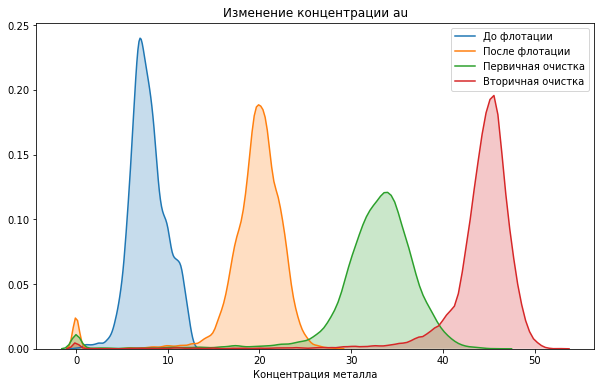

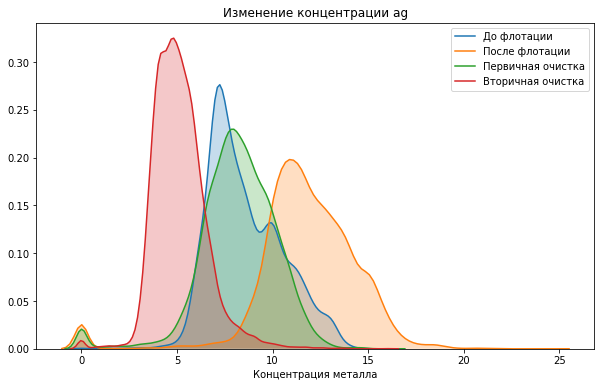

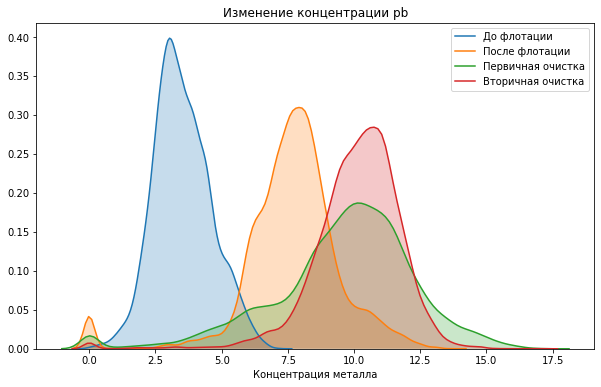

In [5]:
for metal in ['au', 'ag', 'pb']:
    fig = plt.figure()
    ax = fig.add_subplot(1, 1, 1)
    ax.set_title('Изменение концентрации ' + metal)
    ax.set_xlabel('Концентрация металла')
    fig.set_size_inches(10, 6)
    snsplot = sns.kdeplot(dt_train['rougher.input.feed_' + metal], 
                          label='До флотации', shade=True)
    fig = snsplot.get_figure()

    snsplot = sns.kdeplot(dt_train['rougher.output.concentrate_' + metal],
                          label='После флотации', shade=True)
    fig = snsplot.get_figure()

    snsplot = sns.kdeplot(dt_train['primary_cleaner.output.concentrate_' + metal],
                          label='Первичная очистка', shade=True)
    fig = snsplot.get_figure()

    snsplot = sns.kdeplot(dt_train['final.output.concentrate_' + metal],
                          label='Вторичная очистка', shade=True)
    fig = snsplot.get_figure()

Посмотрим на распределение средней концентрации металлов

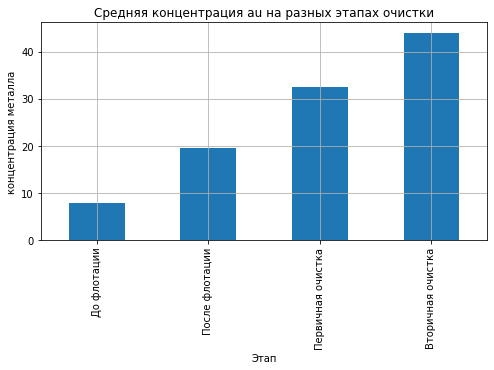

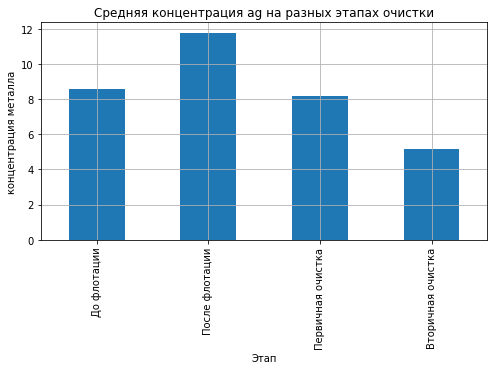

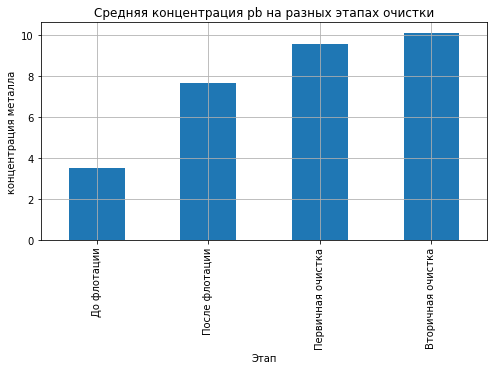

In [6]:
for metal in ['au', 'ag', 'pb']:
    df = pd.DataFrame({'Этап': ['До флотации', 'После флотации',
                    'Первичная очистка', 'Вторичная очистка'],
                    'Концентрация средняя': [dt_train['rougher.input.feed_' + metal].mean(),
                                            dt_train['rougher.output.concentrate_' + metal].mean(), 
                                            dt_train['primary_cleaner.output.concentrate_' + metal].mean(),
                                            dt_train['final.output.concentrate_' + metal].mean()]})
    ax = (
            df.plot(x='Этап',
                kind='bar',
                grid=True,
                figsize=(8, 4))
        )
    ax.set_title('Средняя концентрация ' + metal +' на разных этапах очистки')
    ax.set_xlabel('Этап')
    ax.set_ylabel('концентрация металла')
    ax.legend().remove()
    plt.show()

Средняя концентрация золота увеличивается с каждым этапом очистки. После вторичной очичтски концентрация достигаетя 45 против 8 на начальном этапе. Концентрация серебра достигет максимума после флотации и далее снижается до 5. Концентрация свинца также растет после каждого этапа, разница между первичной и вторичной очистками небольшая.

### Анализ распределения размеров гранул 

Сравним распределения размеров гранул сырья на обучающей и тестовой выборках. Параметры сырья имеют значения input.

In [7]:
dt_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5290 entries, 0 to 5289
Data columns (total 53 columns):
date                                          5290 non-null object
primary_cleaner.input.sulfate                 5286 non-null float64
primary_cleaner.input.depressant              5285 non-null float64
primary_cleaner.input.feed_size               5290 non-null float64
primary_cleaner.input.xanthate                5286 non-null float64
primary_cleaner.state.floatbank8_a_air        5290 non-null float64
primary_cleaner.state.floatbank8_a_level      5290 non-null float64
primary_cleaner.state.floatbank8_b_air        5290 non-null float64
primary_cleaner.state.floatbank8_b_level      5290 non-null float64
primary_cleaner.state.floatbank8_c_air        5290 non-null float64
primary_cleaner.state.floatbank8_c_level      5290 non-null float64
primary_cleaner.state.floatbank8_d_air        5290 non-null float64
primary_cleaner.state.floatbank8_d_level      5290 non-null float64
rougher.in

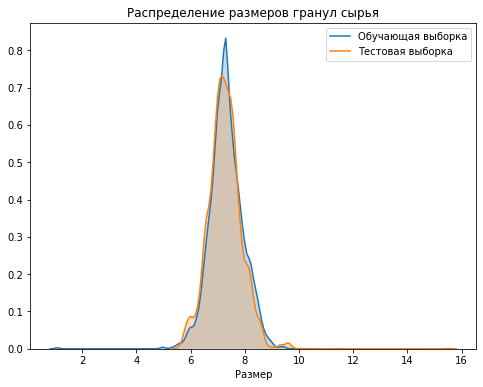

In [8]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Распределение размеров гранул сырья')
ax.set_xlabel('Размер')
fig.set_size_inches(8, 6)

x0 = dt_train['primary_cleaner.input.feed_size']
x1 = dt_test['primary_cleaner.input.feed_size']

snsplot = sns.kdeplot(x0, shade=True, label='Обучающая выборка')
fig = snsplot.get_figure()

snsplot = sns.kdeplot(x1, shade=True, label='Тестовая выборка')
fig = snsplot.get_figure()

Распределения не сильно отличаются друг от друга, оценка модели вероятно будет правильной.

### Исследование суммарной концентрации веществ

Исследуем суммарную концентрацию всех веществ на разных стадиях: в сырье, в черновом и финальном концентратах.

In [9]:
dt_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19439 entries, 0 to 19438
Data columns (total 87 columns):
date                                                  19439 non-null object
final.output.concentrate_ag                           19438 non-null float64
final.output.concentrate_pb                           19438 non-null float64
final.output.concentrate_sol                          19228 non-null float64
final.output.concentrate_au                           19439 non-null float64
final.output.recovery                                 19439 non-null float64
final.output.tail_ag                                  19438 non-null float64
final.output.tail_pb                                  19338 non-null float64
final.output.tail_sol                                 19433 non-null float64
final.output.tail_au                                  19439 non-null float64
primary_cleaner.input.sulfate                         19415 non-null float64
primary_cleaner.input.depressant             

In [10]:
stages = {'сырье':['rougher.input.feed_ag', 'rougher.input.feed_pb',
                   'rougher.input.feed_sol', 'rougher.input.feed_au'], 
            'флотация':['rougher.output.concentrate_ag', 'rougher.output.concentrate_pb',
                        'rougher.output.concentrate_sol', 'rougher.output.concentrate_au'], 
            'первичная очистка':['primary_cleaner.output.concentrate_ag', 'primary_cleaner.output.concentrate_pb',
                                 'primary_cleaner.output.concentrate_sol', 'primary_cleaner.output.concentrate_au'], 
            'финальный концентрат':['final.output.concentrate_ag', 'final.output.concentrate_pb',
                                    'final.output.concentrate_sol', 'final.output.concentrate_au']}


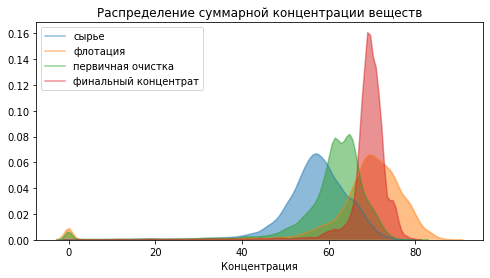

In [11]:
dt_total_concentrate = pd.DataFrame()
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
ax.set_title('Распределение суммарной концентрации веществ')
ax.set_xlabel('Концентрация')
fig.set_size_inches(8, 4)

for key in stages:
    total_concentrate = dt_full[stages[key]]
    total_concentrate[key] = total_concentrate.sum(axis=1)
    #display(total_concentrate[key].describe())
    dt_total_concentrate[key] = total_concentrate[key]
    snsplot = sns.kdeplot(total_concentrate[key], shade=True,  alpha=.5, label=key)
    fig = snsplot.get_figure()

Распределения близки к нормальному, имеют скошенность влево. В данных наблюдаются аномальные значения в районе 0, похожие на выбросы. Посмотрим еще на распределения с помощью графика "Ящик с усами"

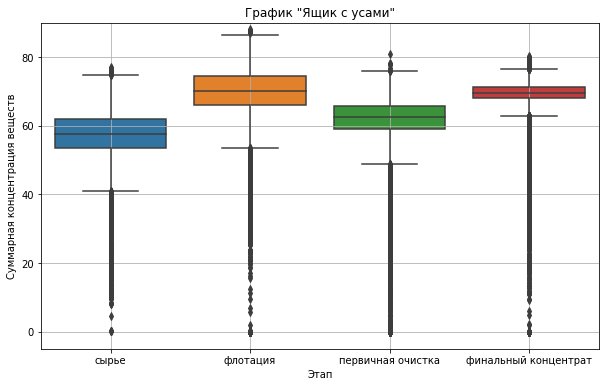

In [12]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=dt_total_concentrate)
plt.ylim(-5, 90)
plt.grid()
plt.title('График "Ящик с усами"')
plt.xlabel('Этап')
plt.ylabel('Cуммарная концентрация веществ')
plt.show()

У распределений концентраций веществ длинные нижние усы, много нулевых значений. Получается что суммарные концентрации равны нулю - это выбросы. Удалим их из тренировочной и тестовой выборок.

In [13]:
dt_train_clean = dt_train
dt_test_clean = dt_test

print('Размер тренировочной выборки до очистки:', dt_train_clean.shape)
print('Размер тестовой выборки до очистки:', dt_test_clean.shape)
for key in stages:
    for row in stages[key]:
        if row in dt_train_clean.columns:
            dt_train_clean.drop(
                index = dt_train_clean[dt_train_clean[row] < 1].index, axis=0, inplace=True)
        if row in dt_test_clean.columns:
            dt_test_clean.drop(
                index = dt_test_clean[dt_test_clean[row] < 1].index, axis=0, inplace=True)
               
print('Тренировочная после очистки:', dt_train_clean.shape)
print('Тестовая после очистки:', dt_test_clean.shape)

Размер тренировочной выборки до очистки: (14149, 87)
Размер тестовой выборки до очистки: (5290, 53)
Тренировочная после очистки: (13426, 87)
Тестовая после очистки: (5276, 53)


## Подготовка данных для обучения моделей 

### Добавление целевых признаков

Добавим целевые признаки в тестовую выборку из исходного  датасета

In [14]:
dt_test_clean = dt_test_clean.merge(
                dt_full[['date', 'rougher.output.recovery', 'final.output.recovery']], 
                how = 'left', on = 'date')

display(dt_test_clean.head())

,date,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,...,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level,rougher.output.recovery,final.output.recovery
0,2016-09-01 00:59:59,210.800909,14.993118,8.080000,1.005021,1398.981301,-500.225577,1399.144926,-499.919735,1400.102998,...,8.016656,-501.289139,7.946562,-432.317850,4.872511,-500.037437,26.705889,-499.709414,89.993421,70.273583
1,2016-09-01 01:59:59,215.392455,14.987471,8.080000,0.990469,1398.777912,-500.057435,1398.055362,-499.778182,1396.151033,...,8.130979,-499.634209,7.958270,-525.839648,4.878850,-500.162375,25.019940,-499.819438,88.089657,68.910432
2,2016-09-01 02:59:59,215.259946,12.884934,7.786667,0.996043,1398.493666,-500.868360,1398.860436,-499.764529,1398.075709,...,8.096893,-500.827423,8.071056,-500.801673,4.905125,-499.828510,24.994862,-500.622559,88.412756,68.143213
3,2016-09-01 03:59:59,215.336236,12.006805,7.640000,0.863514,1399.618111,-498.863574,1397.440120,-499.211024,1400.129303,...,8.074946,-499.474407,7.897085,-500.868509,4.931400,-499.963623,24.948919,-498.709987,87.360133,67.776393
4,2016-09-01 04:59:59,199.099327,10.682530,7.530000,0.805575,1401.268123,-500.808305,1398.128818,-499.504543,1402.172226,...,8.054678,-500.397500,8.107890,-509.526725,4.957674,-500.360026,25.003331,-500.856333,83.236367,61.467078


### Удаление признаков

Удалим из тренировочной выборки признаки отсутствующие в тестовой

In [15]:
test_unavailable_columns.remove('final.output.recovery')
test_unavailable_columns.remove('rougher.output.recovery')

print('Количество столбцов в трейне до удаления:', len(dt_train_clean.columns))
dt_train_clean.drop(test_unavailable_columns, axis=1, inplace=True)
print('Количество столбцов в трейне после удаления:', len(dt_train_clean.columns))


Количество столбцов в трейне до удаления: 87
Количество столбцов в трейне после удаления: 55


Удалим из выборок столбец 'date', который не может влиять на коэффициент восстановления золота. 

In [16]:
dt_train_clean.drop('date', axis=1, inplace=True)
dt_test_clean.drop('date', axis=1, inplace=True)
print('Количество столбцов в трейне после удаления:', len(dt_train_clean.columns))
print('Количество столбцов в тесте после удаления:', len(dt_test_clean.columns))

Количество столбцов в трейне после удаления: 54
Количество столбцов в тесте после удаления: 54


Удалим пропуски из обучающей и тестовой выборок

In [17]:
print('Тренировочная до:', dt_train_clean.shape)
print('Тестовая до:', dt_test_clean.shape)

dt_train_clean.dropna(inplace=True)
dt_test_clean.dropna(inplace=True)

print('Тренировочная после:', dt_train_clean.shape)
print('Тестовая после:', dt_test_clean.shape)

Тренировочная до: (13426, 54)
Тестовая до: (5276, 54)
Тренировочная после: (12150, 54)
Тестовая после: (5216, 54)


Выделим из обучающей и тестовой выборок целевывые признаки

In [18]:
target_train_rougher = dt_train_clean['rougher.output.recovery']
target_train_final = dt_train_clean[ 'final.output.recovery']
features_train = dt_train_clean.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

target_test_rougher = dt_test_clean['rougher.output.recovery']
target_test_final = dt_test_clean['final.output.recovery']
features_test = dt_test_clean.drop(['rougher.output.recovery', 'final.output.recovery'], axis=1)

### Стандартизация признаков

Чтобы не потерять значимость численных признаков из-за разности масштабов, стандартизируем их. 

In [19]:
scaler = StandardScaler()
columns = features_train.columns

scaler.fit(features_train[columns]) 
features_train[columns] = scaler.transform(features_train[columns])
features_test[columns] = scaler.transform(features_test[columns])

display(features_train.head())
display(features_test.head())

,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,-0.280517,0.295089,-0.157094,0.280935,-0.423512,-0.311740,-0.413829,-0.806945,-0.416849,-0.287980,...,-1.017814,-0.472676,-0.614694,-0.751494,-1.167068,-0.378135,-0.847962,-0.422121,-0.987544,-2.578445
1,-0.320419,0.346046,-0.157094,0.319165,-0.220317,-0.366713,-0.229432,-0.332284,-0.224663,-0.306230,...,-1.022148,-0.532005,-0.643104,-0.693909,-1.147520,-0.425386,-0.864528,-0.424889,-1.014729,-2.419807
2,-0.369776,0.655516,-0.157094,0.287827,-0.024831,-0.341688,-0.045638,-0.353578,-0.033294,-0.349988,...,-1.018135,-0.473323,-0.650282,-0.690538,-1.142071,-0.424348,-0.859445,-0.423281,-1.009343,-2.462781
3,-0.412046,0.657294,-0.157094,0.302876,-0.037053,-0.368005,-0.043588,-0.326866,-0.045798,-0.345990,...,-1.014341,-0.440589,-0.633783,-0.691564,-1.159371,-0.400783,-0.865825,-0.416768,-1.013450,-2.425282
4,-0.528851,0.836744,-0.157094,0.338978,-0.026498,-0.313487,-0.037732,-0.345412,-0.051112,-0.350497,...,-1.015967,-0.420545,-0.642621,-0.689185,-1.167055,-0.463922,-0.880327,-0.419260,-1.015032,-2.464597


,primary_cleaner.input.sulfate,primary_cleaner.input.depressant,primary_cleaner.input.feed_size,primary_cleaner.input.xanthate,primary_cleaner.state.floatbank8_a_air,primary_cleaner.state.floatbank8_a_level,primary_cleaner.state.floatbank8_b_air,primary_cleaner.state.floatbank8_b_level,primary_cleaner.state.floatbank8_c_air,primary_cleaner.state.floatbank8_c_level,...,secondary_cleaner.state.floatbank4_a_air,secondary_cleaner.state.floatbank4_a_level,secondary_cleaner.state.floatbank4_b_air,secondary_cleaner.state.floatbank4_b_level,secondary_cleaner.state.floatbank5_a_air,secondary_cleaner.state.floatbank5_a_level,secondary_cleaner.state.floatbank5_b_air,secondary_cleaner.state.floatbank5_b_level,secondary_cleaner.state.floatbank6_a_air,secondary_cleaner.state.floatbank6_a_level
0,2.002886,1.771046,1.218541,0.325649,-1.584549,-0.347972,-1.559258,-0.333830,-1.518822,-0.345325,...,-1.369692,-0.380350,-1.391177,-0.693188,-1.507584,1.298534,-1.407743,-0.411331,1.243326,0.202268
1,2.128134,1.769333,1.218541,0.285638,-1.586115,-0.343334,-1.567453,-0.329767,-1.547900,-0.304121,...,-1.363586,-0.398058,-1.369437,-0.665030,-1.505570,-1.077576,-1.406637,-0.414440,0.943742,0.199385
2,2.124520,1.131436,0.732373,0.300963,-1.588303,-0.365704,-1.561398,-0.329375,-1.533739,-0.386048,...,-1.380494,-0.399469,-1.375919,-0.685332,-1.486164,-0.441435,-1.402051,-0.406130,0.939286,0.178343
3,2.126601,0.865017,0.489289,-0.063426,-1.579646,-0.310400,-1.572080,-0.313489,-1.518629,-0.279236,...,-1.368008,-0.391273,-1.380092,-0.662311,-1.516097,-0.443133,-1.397465,-0.409493,0.931122,0.228453
4,1.683692,0.463241,0.306976,-0.222730,-1.566942,-0.364047,-1.566900,-0.321913,-1.503597,-0.348314,...,-1.369372,-0.439196,-1.383947,-0.678017,-1.479826,-0.663113,-1.392879,-0.419360,0.940791,0.172218


## Модель

### Рассчет sMAPE

Напишем функцию для вычисления итоговой sMAPE

In [20]:
def smape(target, predictions, **kwargs):
    target = np.array(target)
    smape = (abs(target - predictions) / ((abs(target) + abs(predictions)) / 2)).sum() / len(target) * 100
    return smape

Функция для рассчета итоговой метрики:

In [21]:
def smape_total(smape_rougher, smape_final):
    smape_total = 0.25 * smape_rougher + 0.75 * smape_final
    return smape_total

### Обучение и настройка моделей

Перейдем к обучению и настройке моделей.  

Предварительно настроим собственную функцию оценки модели.

In [22]:
my_scorer = make_scorer(smape, greater_is_better=False)

Проведем предварительное тестирование нескольких алгоритмов обучения (Случайный лес, Линейная регрессия и Регуляризованная линейная регрессия - Лассо-регрессия)

In [23]:
models = [RandomForestRegressor(random_state=12345), LinearRegression(),
          Lasso(random_state=12345)]
m_names = ['Случайный лес', 'Линейная регрессия', 'Лассо-регрессия']

for model, name in zip(models, m_names):
    m = model
    scores = cross_val_score(m, features_train, target_train_final, scoring = my_scorer, cv=5)
    final_score = scores.mean()
    print('Модель ' + name)
    print('Средняя оценка качества модели:', final_score)
    print()   

Модель Случайный лес
Средняя оценка качества модели: -10.134436598253384

Модель Линейная регрессия
Средняя оценка качества модели: -10.175299457169455

Модель Лассо-регрессия
Средняя оценка качества модели: -8.753850452387287



Лучший результат показывает модель Лассо-регрессия. Выполним поиск и обучение наилучших моделей с подбором гиперпараметров и кросс-валидацией.

In [24]:
%%time
best_score_rougher = 100
best_alpha_rougher = 0

best_score_final = 100
best_alpha_final = 0

for alpha in np.arange(0, 1, 0.06):
    #print('a:', alpha)
    model = Lasso(alpha=alpha, random_state=12345)
    
    scores_rougher = cross_val_score(model, features_train, target_train_rougher,
                                     scoring = my_scorer, cv=5)
    mean_score_rougher = scores_rougher.mean()
    #print('score_rougher:', mean_score_rougher)
    if abs(mean_score_rougher) < abs(best_score_rougher):
        best_score_rougher = mean_score_rougher
        best_alpha_rougher = alpha          
    
    scores_final = cross_val_score(model, features_train, target_train_final,
                                   scoring = my_scorer, cv=5)
    mean_score_final = scores_final.mean()
    #print('score_final:', mean_score_final)
    if abs(mean_score_final) < abs(best_score_final):
        best_score_final = mean_score_final
        best_alpha_final = alpha       

print('Лучший результат sMAPE для "rougher.output.recovery":', best_score_rougher)
print('Гиперпараметр alpha:', best_alpha_rougher)
print()
print('Лучший результат sMAPE для "final.output.recovery":', best_score_final)
print('Гиперпараметр alpha:', best_alpha_final)
print()

Лучший результат sMAPE для "rougher.output.recovery": -6.25032638060374
Гиперпараметр alpha: 0.18

Лучший результат sMAPE для "final.output.recovery": -8.581416243392722
Гиперпараметр alpha: 0.48

CPU times: user 1min 6s, sys: 1min 6s, total: 2min 13s
Wall time: 2min 13s


### Тестирование модели

Обучим модели с лучшими гиперпараметрами и проверим какой результат будет на тестовой выборке

In [25]:
best_model_rougher = Lasso(alpha=0.18, random_state=12345)
best_model_rougher.fit(features_train, target_train_rougher)
predict_rougher = best_model_rougher.predict(features_test)

best_model_final = Lasso(alpha=0.48, random_state=12345)
best_model_final.fit(features_train, target_train_final)
predict_final = best_model_final.predict(features_test)

result_rougher = smape(target_test_rougher, predict_rougher)
result_final = smape(target_test_final, predict_final)
print('Итоговое sMAPE на тестовой выборке:', smape_total(result_rougher, result_final))

Итоговое sMAPE на тестовой выборке: 8.053402415214276


Проверим модель на адекватность, сравним с медианной константной моделью

In [26]:
model_median = DummyRegressor(strategy='median')

model_median.fit(features_train, target_train_rougher)
predict_rougher_const = model_median.predict(features_test)

model_median.fit(features_train, target_train_final)
predict_final_const = model_median.predict(features_test)

result_rougher_const = smape(target_test_rougher, predict_rougher_const)
result_final_const = smape(target_test_final, predict_final_const)
print('Итоговое sMAPE для медианной константной модели:', 
      smape_total(result_rougher_const, result_final_const))

Итоговое sMAPE для медианной константной модели: 8.964888412605294


Результат наших моделей лучше, чем у константной,  8.05 против 8.96. Модель прошла проверку на адекватность.

## Заключение

Для решения поставленной задачи, были исследованы данные с параметрами добычи и очистки золотосодержащей руды.  
Была проверена правильность вычисления эффективности обогащения. Исследовано изменение концентрации элементов на каждом этапе очистки, проанализированы распределения размеров гранул и суммарных концентраций веществ. На этапе подготовки к обучению моделей были удалены пропуски в данных, заолнены недостающие столбцы, данные были стандартизированы.  
Проведно предварительное тестирование алгоритмов обучения: Случайный лес, Линейная регрессия и Лассо-регрессия. Лучший результат показала модель Лассо-регрессии. Были проведены дополнительные исследования и подобраны гиперпараметры для данной модели, проведена кросс-валидация. Итоговая модель прошла проверку на адекватность с результатом sMAPE 8.05.